In [15]:
import pandas as pd
import missingno as msno

In [16]:
df = pd.read_excel('Datos/Originales/Prestamos_Data_Alumnos_v3.xlsx',index_col="ID")

In [17]:
df.dtypes


Edad                      int64
Ingresos                  int64
Monto_Inicial             int64
Scoring_Crediticio        int64
Meses_Empleo              int64
Num_Creditos              int64
Ratio_Interes           float64
Duracion                  int64
Ratio_Deuda_Ingresos    float64
Estudios                 object
Tipo_Jornada_Laboral     object
Estado_Civil             object
Posesion_Hipoteca         int64
Personas_Cargo            int64
Proposito                object
Fiador                    int64
Impago                    int64
Prima                   float64
dtype: object

<Axes: >

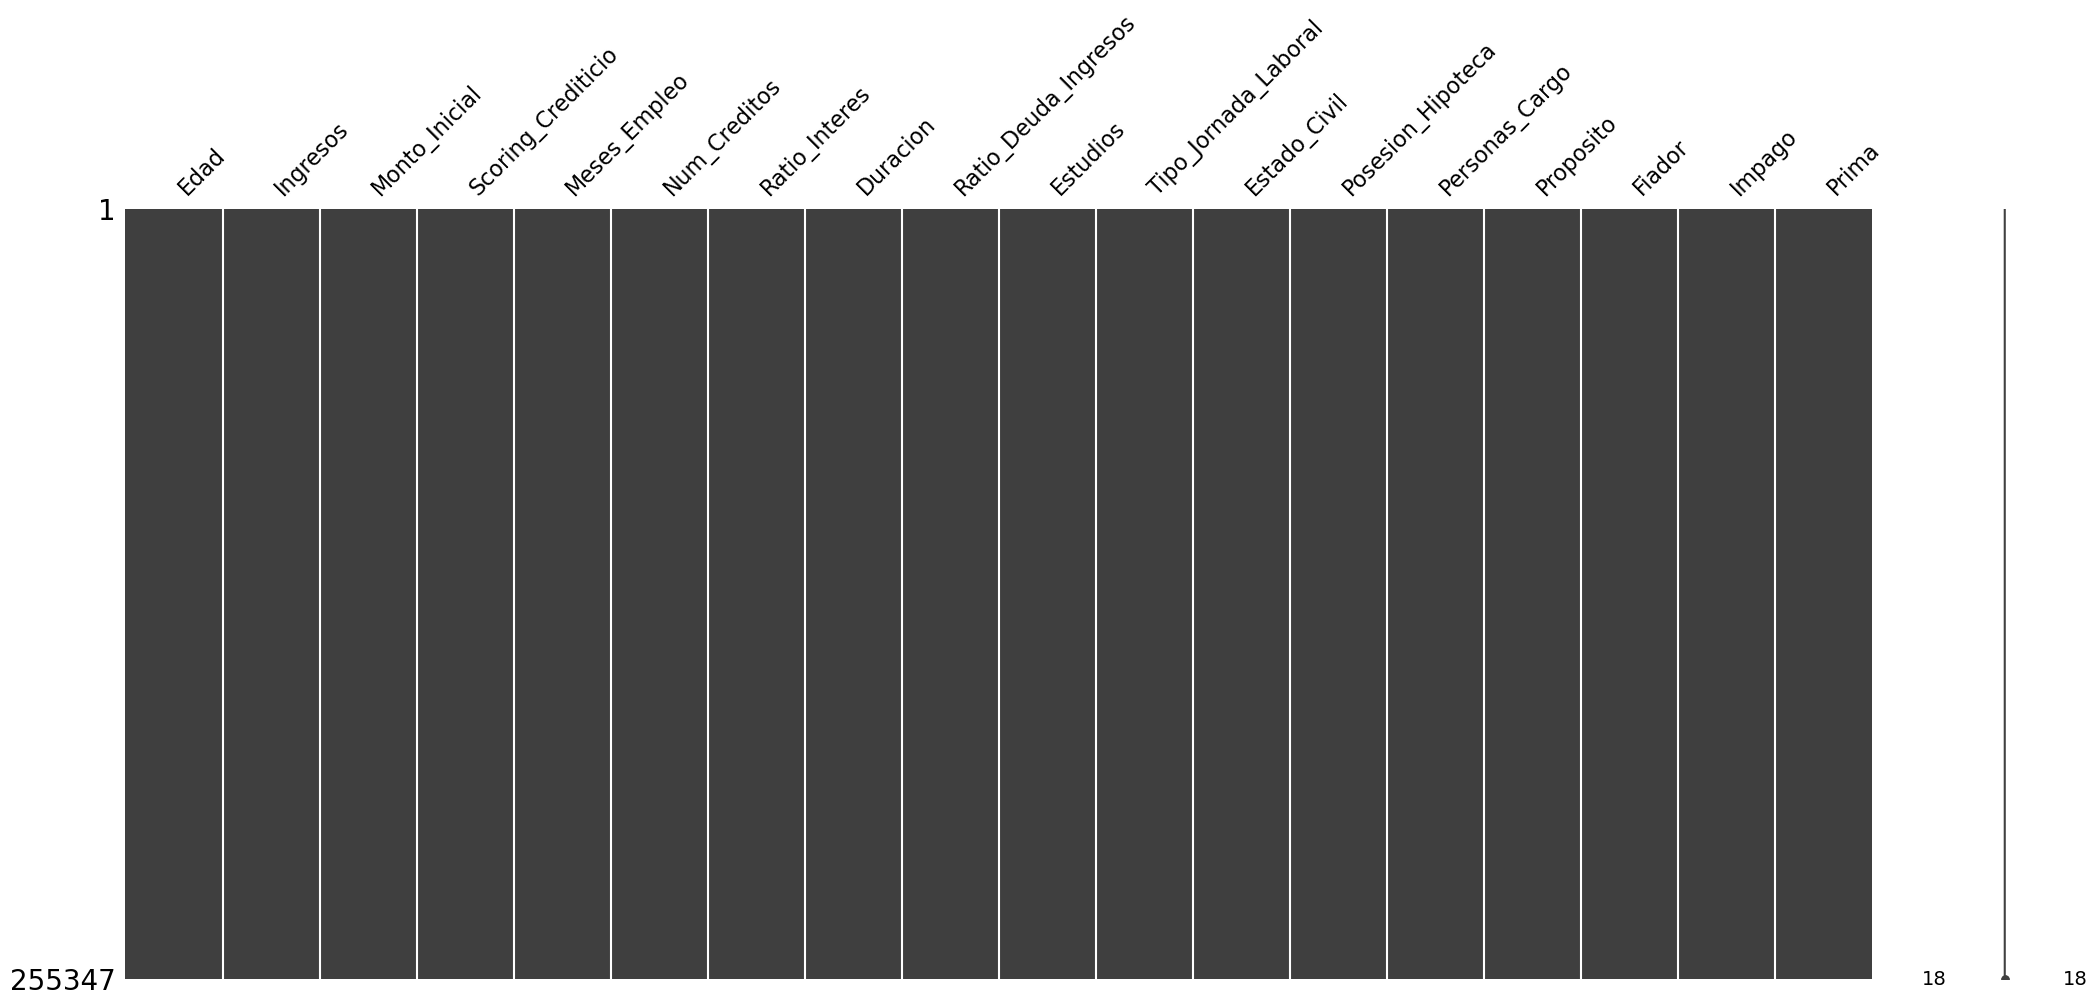

In [18]:
msno.matrix(df)

In [19]:
df.head()

,Edad,Ingresos,Monto_Inicial,Scoring_Crediticio,Meses_Empleo,Num_Creditos,Ratio_Interes,Duracion,Ratio_Deuda_Ingresos,Estudios,Tipo_Jornada_Laboral,Estado_Civil,Posesion_Hipoteca,Personas_Cargo,Proposito,Fiador,Impago,Prima
ID,,,,,,,,,,,,,,,,,,
S97R7X,18,16000,5000,397,19,1,8.06,48,0.10,Escolar,Autónomo,Soltero,1,0,Automóvil,0,0,50.12
T3ZE0N,69,72673,32340,784,320,2,15.04,48,0.12,Doctorado,Tiempo parcial,Casado,0,1,Educación,0,0,187.15
RLGTBY,50,62116,37278,486,217,3,21.96,12,0.55,Grado Universitario,Tiempo parcial,Casado,1,0,Automóvil,1,1,800.00
BZ86CV,64,59846,19784,308,340,1,24.26,12,0.35,Grado Universitario,Desempleado,Divorciado,1,0,Negocios,1,0,275.82
5OD75M,62,28413,13751,412,476,2,5.73,36,0.14,Escolar,Autónomo,Casado,0,0,Negocios,0,0,100.07


In [20]:
df.columns

Index(['Edad', 'Ingresos', 'Monto_Inicial', 'Scoring_Crediticio',
       'Meses_Empleo', 'Num_Creditos', 'Ratio_Interes', 'Duracion',
       'Ratio_Deuda_Ingresos', 'Estudios', 'Tipo_Jornada_Laboral',
       'Estado_Civil', 'Posesion_Hipoteca', 'Personas_Cargo', 'Proposito',
       'Fiador', 'Impago', 'Prima'],
      dtype='object')

In [21]:
df["Estudios"].unique()

array(['Escolar', 'Doctorado', 'Grado Universitario', 'Máster'],
      dtype=object)

In [22]:

df["Proposito"].unique()

array(['Automóvil', 'Educación', 'Negocios', 'Vivienda', 'Otros'],
      dtype=object)

In [23]:
df_auto=df[df["Proposito"]=="Automóvil"]
df_auto = df_auto.drop(columns=['Proposito'])

In [ ]:
df_auto.describe() 

,Edad,Ingresos,Monto_Inicial,Scoring_Crediticio,Meses_Empleo,Num_Creditos,Ratio_Interes,Duracion,Ratio_Deuda_Ingresos,Posesion_Hipoteca,Personas_Cargo,Fiador,Impago,Prima
count,50844.000000,50844.000000,50844.000000,50844.000000,50844.000000,50844.000000,50844.000000,50844.000000,50844.000000,50844.000000,50844.000000,50844.000000,50844.000000,50844.000000
mean,43.546515,41576.934230,19956.130891,574.575918,213.075112,2.496204,13.467197,36.004248,0.208622,0.503344,0.500865,0.503186,0.118814,209.379292
std,15.039088,16061.361242,13669.672392,159.133466,151.227263,1.119726,6.634673,17.003908,0.136446,0.499994,0.500004,0.499995,0.323573,158.868114
min,18.000000,16000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000,0.000000,0.000000,0.000000,12.580000
25%,31.000000,30471.000000,9834.000000,437.000000,69.000000,1.000000,7.740000,24.000000,0.100000,0.000000,0.000000,0.000000,0.000000,93.330000
50%,43.000000,39200.500000,16712.500000,573.000000,207.000000,2.000000,13.420000,36.000000,0.150000,1.000000,1.000000,1.000000,0.000000,164.815000
75%,57.000000,50195.000000,26210.000000,713.000000,337.000000,4.000000,19.230000,48.000000,0.270000,1.000000,1.000000,1.000000,0.000000,276.342500
max,69.000000,120000.000000,80000.000000,849.000000,626.000000,4.000000,25.000000,60.000000,0.550000,1.000000,1.000000,1.000000,1.000000,800.000000


In [25]:
df_auto=pd.get_dummies(df_auto,columns=["Tipo_Jornada_Laboral","Estado_Civil"],drop_first=False)
df_auto.columns
columnas_dummy = df_auto.select_dtypes(include='bool').columns
df_auto[columnas_dummy] = df_auto[columnas_dummy].astype(int)

In [26]:
mapa_estudios = {
    "Escolar": 0,
    "Grado Universitario": 1,
    "Máster": 2,
    "Doctorado": 3
}

df_auto["Estudios"] = df_auto["Estudios"].map(mapa_estudios)

df_auto.head()

,Edad,Ingresos,Monto_Inicial,Scoring_Crediticio,Meses_Empleo,Num_Creditos,Ratio_Interes,Duracion,Ratio_Deuda_Ingresos,Estudios,...,Fiador,Impago,Prima,Tipo_Jornada_Laboral_Autónomo,Tipo_Jornada_Laboral_Desempleado,Tipo_Jornada_Laboral_Jornada completa,Tipo_Jornada_Laboral_Tiempo parcial,Estado_Civil_Casado,Estado_Civil_Divorciado,Estado_Civil_Soltero
ID,,,,,,,,,,,,,,,,,,,,,
S97R7X,18,16000,5000,397,19,1,8.06,48,0.10,0,...,0,0,50.12,1,0,0,0,0,0,1
RLGTBY,50,62116,37278,486,217,3,21.96,12,0.55,1,...,1,1,800.00,0,0,0,1,1,0,0
SKE2P9,37,37602,44532,765,150,3,11.20,60,0.23,1,...,1,0,356.30,0,0,0,1,1,0,0
E2FB1D,56,67410,23752,643,369,1,21.24,24,0.18,1,...,0,0,198.72,1,0,0,0,1,0,0
TKSCGH,35,35930,28440,645,136,3,16.95,12,0.55,1,...,1,0,484.20,0,0,1,0,0,0,1


In [27]:
df_auto.shape

(50844, 22)

In [28]:
df_auto.to_csv("Datos/Transformados/df_limpio.csv",index=True)